In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\hp\Downloads\steam_dataset.csv")

In [2]:
df.isna().sum()

Unnamed: 0           0
appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
revenue              0
dtype: int64

In [44]:

df = df.drop(columns=['Unnamed: 0'])
print(df.columns)

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  int64 

In [47]:
df["publisher"].isna().sum()

0

In [48]:
df["publisher"]=np.where(df["publisher"].isna(),df["publisher"].mode(),df["publisher"])
df["publisher"].value_counts()

publisher
Big Fish Games           226
Strategy First           136
Ubisoft                  111
THQ Nordic                98
Square Enix               97
                        ... 
Tonka3D                    1
guyhezi                    1
Robert Gammon              1
Phun Peeticharoenthum      1
SHEN JIAWEI                1
Name: count, Length: 14353, dtype: int64

In [49]:
df["developer"].isna().sum()

0

In [50]:
df["developer"]=np.where(df["developer"].isna(),df["developer"].mode(),df["developer"])
df["developer"].value_counts()

developer
Choice of Games               95
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
                              ..
CRAPPY ZOMBIE GAME STUDIO      1
Ramon Mujica                   1
Oomst Games                    1
Joe Censored Games             1
Adept Studios GD               1
Name: count, Length: 17112, dtype: int64

In [51]:
df.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
revenue             0
dtype: int64

In [52]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,10000000,3.99,39900000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,10000000,3.99,39900000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,10000000,3.99,39900000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,10000000,3.99,39900000.0


In [53]:
# Q1 : what platforms are present in the data
# expected answer : ['windows', 'mac', 'linux']
platforms = df['platforms'].unique()
print(platforms)


['windows;mac;linux' 'windows;mac' 'windows' 'windows;linux' 'mac'
 'mac;linux' 'linux']


In [54]:
platforms = ['windows', 'mac', 'linux']
list = []

for i in platforms:
    if df['platforms'].str.contains(i).any:
        list.append(i)

print(list)


['windows', 'mac', 'linux']


In [55]:
# Q2 CEO:  which platform has most no of games
# Answer : windows has maximum no of titles 

In [56]:
df1= df['platforms'].str.get_dummies(sep=';').sum()
print(df1)

linux       5235
mac         8066
windows    27070
dtype: int64


In [57]:
# Q3 CEO:  which category has most no of games
data = df['categories'].str.get_dummies(sep=';').sum()
print(data)
data1 = data.idxmax()
data1

Captions available              721
Co-op                          1721
Commentary available            144
Cross-Platform Multiplayer     1081
Full controller support        5695
In-App Purchases                690
Includes Source SDK              35
Includes level editor          1036
Local Co-op                    1059
Local Multi-Player             1615
MMO                             421
Mods                              2
Mods (require HL2)                1
Multi-player                   3974
Online Co-op                   1071
Online Multi-Player            2487
Partial Controller Support     4234
Shared/Split Screen            2152
Single-player                 25678
Stats                          1878
Steam Achievements            14130
Steam Cloud                    7219
Steam Leaderboards             3439
Steam Trading Cards            7918
Steam Turn Notifications         63
Steam Workshop                  897
SteamVR Collectibles             40
VR Support                  

'Single-player'

In [58]:
# Q4  Which Category of games has the highest average play time.
data = df['categories'].str.get_dummies(sep=';').mean()
print(data)

data1 = data.idxmax()
data1

Captions available            0.026630
Co-op                         0.063564
Commentary available          0.005319
Cross-Platform Multiplayer    0.039926
Full controller support       0.210342
In-App Purchases              0.025485
Includes Source SDK           0.001293
Includes level editor         0.038264
Local Co-op                   0.039114
Local Multi-Player            0.059649
MMO                           0.015549
Mods                          0.000074
Mods (require HL2)            0.000037
Multi-player                  0.146777
Online Co-op                  0.039557
Online Multi-Player           0.091856
Partial Controller Support    0.156380
Shared/Split Screen           0.079483
Single-player                 0.948403
Stats                         0.069363
Steam Achievements            0.521884
Steam Cloud                   0.266630
Steam Leaderboards            0.127018
Steam Trading Cards           0.292447
Steam Turn Notifications      0.002327
Steam Workshop           

'Single-player'

In [59]:
# Q5 how does age influence average play time?
# which age has the highest
# find out sum, average, min, max for average playtimes for different age groups

df.groupby('required_age')['average_playtime'].agg(['sum', 'mean', 'min', 'max'])

,sum,mean,min,max
required_age,,,,
0,3726711,140.742135,0,190625
3,1861,169.181818,0,1350
7,726,60.500000,0,244
12,16520,226.301370,0,2622
16,127648,664.833333,0,28897
18,182503,592.542208,0,10659


In [60]:
# Q6 Find out the most frequent platform among the top 5 profitable games.
data = df.sort_values(by='revenue', ascending=False).head(5)
platform = data['platforms'].value_counts()
platform.idxmax()


'windows'

In [61]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')

In [65]:
# Q7 what is the optimal age restriction to make highest profit profitable game ?
df.sort_values(by='achievements', ascending=False).iloc[0]

appid                                                          573060
name                                                       LOGistICAL
release_date                                               2017-02-15
english                                                             1
developer                                                      Sacada
publisher                                                      Sacada
platforms                                                     windows
required_age                                                        0
categories          Single-player;Steam Achievements;Steam Trading...
genres                                          Casual;Indie;Strategy
steamspy_tags                                   Casual;Strategy;Indie
achievements                                                     9821
positive_ratings                                                  125
negative_ratings                                                   35
average_playtime    

# ChatGPT qns 
# Beginner-Level (Basic Understanding):

In [67]:
# 1. How many games are in the dataset?
games = df.shape[0]

print("Number of games in the dataset:", games)

Number of games in the dataset: 27075


In [70]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')

In [193]:
# 2. What are the names of the first 5 games in the dataset?


Object `dataset` not found.


In [73]:
game_names = df['name'].head(5)
print(game_names)

0               Counter-Strike
1        Team Fortress Classic
2                Day of Defeat
3           Deathmatch Classic
4    Half-Life: Opposing Force
Name: name, dtype: object


In [75]:
# 3. How many games are in English?
df['categories'].str.contains('English', case=False, na=False).sum()

0

In [80]:
# 4. What is the average price of the games in the dataset?
df['price'].mean()

6.078193167128348

In [84]:
# 5. Which game has the highest number of positive ratings?
data=df.sort_values(by='positive_ratings', ascending=False).iloc[0]
game_name = data['name']
positive_ratings = data['positive_ratings']
print(game_name)
print(positive_ratings)

Counter-Strike: Global Offensive
2644404


In [77]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')

In [86]:
# 6. How many unique developers are listed in the dataset?
data=df['developer'].nunique()
data

17112

In [96]:
# 7. What is the most common platform for the games in this dataset?
counts=df['platforms'].value_counts()
data = counts.idxmax()
most_common_platform = counts.max()

print(data)  
print(most_common_platform)

windows
18398


In [99]:
# 8. How many games have a required age of 18 or higher?
df['required_age'] = pd.to_numeric(df['required_age'], errors='coerce') 
games_age = df[df['required_age'] >= 18]
games_age.shape[0]

308

In [101]:
# 9. What is the total revenue generated by all games in the dataset?
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce') 
revenue = df['revenue'].sum()
revenue

42904149200.0

In [102]:
# 10. How many games have more than 50 achievements?
df['achievements'] = pd.to_numeric(df['achievements'], errors='coerce')  
game_achievements = df[df['achievements'] > 50]
number_of_games = game_achievements.shape[0]
number_of_games 

2125

# Intermediate-Level (Deeper Insights):

In [104]:
# 1. What is the correlation between the price of a game and its positive ratings?
df['price'] = pd.to_numeric(df['price'], errors='coerce') 
df['positive_ratings'] = pd.to_numeric(df['positive_ratings'], errors='coerce')

correlation = df['price'].corr(df['positive_ratings'])
correlation

0.036109577993435234

In [105]:
# 2. How many games are published by the publisher "Indie Voyage"?
games=df[df['publisher'].str.contains('Indie Voyage', case=False, na=False)]
games.shape[0]

3

In [189]:
# 3. What is the median playtime for games that have over 100 positive ratings?


Object `ratings` not found.


In [110]:
df['positive_ratings'] = pd.to_numeric(df['positive_ratings'], errors='coerce')
df['median_playtime'] = pd.to_numeric(df['median_playtime'], errors='coerce')

games_with_more_than_100_ratings = df[df['positive_ratings'] > 100]


median_playtime = games_with_more_than_100_ratings['median_playtime'].median()
median_playtime

56.0

In [111]:
# 4. What percentage of games have at least 1 Steam achievement?
df['achievements'] = pd.to_numeric(df['achievements'], errors='coerce')  

achievement = df[df['achievements'] > 0]

total_games = df.shape[0]

achievement.shape[0] / total_games * 100

56.18097876269621

In [190]:
# 5. How many games are classified under the "Action" genre?


Object `genre` not found.


In [113]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'revenue'],
      dtype='object')

In [114]:
games_action=df[df['genres'].str.contains('Action', case=False, na=False)]
games_action.shape[0]

11903

In [116]:
# 6. What is the average number of negative ratings for games with over 10,000 owners?
df['owners'] = pd.to_numeric(df['owners'], errors='coerce') 
df['negative_ratings'] = pd.to_numeric(df['negative_ratings'], errors='coerce')
owners = df[df['owners'] > 10000]
owners['negative_ratings'].mean()

211.02714681440443

In [117]:
# 7. Which developer has the most games listed in the dataset?
developer=df['developer'].value_counts()

most_games = developer.idxmax()
games_count = developer.max()

print(most_games)
print(games_count)

Choice of Games
95


In [119]:
# 8. What is the average playtime for games with more than 500 positive ratings?
new_df=df[df['positive_ratings']>500]
new_df['average_playtime'].mean()

817.0091855480711

In [118]:
# 9. How many games are tagged as "Early Access" in their steamspy_tags?
len(df[df['steamspy_tags'].str.contains('Early Access')])

2967

In [120]:
# 10. What is the total revenue generated by games that have "RPG" in their genre?
new_df=df[df['genres']=='RPG']
new_df['revenue'].sum()

1829827500.0

# Advanced-Level (Complex Analysis):

In [121]:
# 1. What is the relationship between a game's price and its revenue? Is there a positive or negative correlation?
df['price'].corr(df['revenue'])

0.14788822771568727

In [122]:
# 2. What is the average number of positive ratings for games released before 2015 compared to those released after 2015?
df['release_date'] = pd.to_datetime(df['release_date'])

before_2015 = df[df['release_date'].dt.year < 2015]
after_2015 = df[df['release_date'].dt.year >= 2015]

before_ratings = before_2015['positive_ratings'].mean()
after_ratings = after_2015['positive_ratings'].mean()

print("Before 2015 Average positive ratings :", before_ratings)
print("After 2015 Average positive ratings :", after_ratings)

Before 2015 Average positive ratings : 4117.850014762326
After 2015 Average positive ratings : 554.8363728470111


In [123]:
# 3. Find the top 5 genres that generate the highest average revenue.
df['genres_split']=df['genres'].str.split(';')#.explode()
df_exploaded = df.explode('genres_split')

df_exploaded.groupby(['genres_split'])['revenue'].mean().sort_values(ascending=False).head()

genres_split
Massively Multiplayer    5.821937e+06
Web Publishing           4.586529e+06
Action                   2.270695e+06
Design & Illustration    2.166987e+06
RPG                      2.145811e+06
Name: revenue, dtype: float64

In [124]:
# 4. What is the average price for games with more than 50 achievements and more than 100 positive ratings?
new_df = df[(df['achievements']>50) & (df['positive_ratings']>100)]
new_df['price'].mean()

11.884162724692526

In [125]:
# 5. How many games are available on multiple platforms (e.g., Windows and another platform)?
df['num_platforms']=df['platforms'].str.split(';').apply(len)
len(df[df['num_platforms']>1])

8673

In [160]:
# 6. Which genre has the highest number of games with over 1,000 positive ratings?


In [158]:
df['positive_ratings'] = pd.to_numeric(df['positive_ratings'], errors='coerce')


games_with_more_than_1000_ratings = df[df['positive_ratings'] > 1000]

if games_with_more_than_1000_ratings['genres'].str.contains(',').any():
    games_with_more_than_1000_ratings['genres'] = games_with_more_than_1000_ratings['genres'].str.split(',')
    df_exploded = games_with_more_than_1000_ratings.explode('genres')
else:
    df_exploded = games_with_more_than_1000_ratings

most_common_genre = df_exploded['genres'].value_counts().idxmax()
most_common_count = df_exploded['genres'].value_counts().max()

print("Genre with the highest number of games with over 1,000 positive ratings:", most_common_genre)
print("Number of games in this genre:", most_common_count)

Genre with the highest number of games with over 1,000 positive ratings: ['Action']
Number of games in this genre: 228


In [130]:
# 7. For games with a price higher than $20, what is the median playtime compared to games priced under $20?
under_20 = df[df['price']<20]
above_20 = df[df['price']>=20]

med_play_under_20 = under_20['median_playtime'].median()
med_play_above_20 = above_20['median_playtime'].median()

print('Median PLaytime for game under 20$ :',med_play_under_20)
print('Median PLaytime for game above 20$ :',med_play_above_20)


Median PLaytime for game under 20$ : 0.0
Median PLaytime for game above 20$ : 0.0


In [131]:
# 8. Build a model to predict the number of positive ratings based on features like price, release date, and genre.
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Split genres
df['genres'] = df['genres'].str.split(';')
df_exploded = df.explode('genres')


In [132]:
# Features and target variable
X = df_exploded[['price', 'release_year', 'release_month', 'genres']]
y = df_exploded['positive_ratings']


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [134]:
X_train_num=X_train.select_dtypes(exclude=['object'])
X_train_cat=X_train.select_dtypes(include=['object'])

In [135]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train_num_transformed=pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns=std_scaler.get_feature_names_out(),
                                    index=X_train_num.index)



In [136]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder(handle_unknown="use_encoded_value",
                              unknown_value=-1,
                              encoded_missing_value=-5)
X_train_cat_transformed=pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                                    columns=ordinal_encoder.get_feature_names_out(),
                                    index=X_train_cat.index)
X_train_cat_transformed.head()

,genres
9208,2.0
2422,21.0
6884,10.0
14246,2.0
5688,22.0


In [137]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)
X_train_transformed.head()

,price,release_year,release_month,genres
9208,-0.645648,-0.391732,-0.441366,2.0
2422,0.714893,-1.466853,-1.306288,21.0
6884,-0.747046,-0.929293,1.000171,10.0
14246,0.150140,0.145828,-0.729673,2.0
5688,-0.747046,0.145828,0.711863,22.0


In [138]:
X_test_num=X_test.select_dtypes(exclude=['object'])
X_test_cat=X_test.select_dtypes(include=['object'])


In [139]:
# Numerical data ttransformation
X_test_num_transformed=pd.DataFrame(std_scaler.transform(X_test_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=X_test_num.index)

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat),
                                      columns=ordinal_encoder.get_feature_names_out(),
                                     index=X_test_cat.index)

X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)
X_test_transformed.head()

,price,release_year,release_month,genres
7164,-0.234918,-0.929293,1.288478,2.0
1418,0.150140,-2.541974,0.711863,17.0
25933,-0.645648,0.683389,1.576786,13.0
25616,-0.747046,1.220950,-0.729673,13.0
22926,-0.645648,0.683389,0.135249,13.0


In [140]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_transformed,y_train)

y_test_predicted=linear_regressor.predict(X_test_transformed)
error=metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:", error)


Mean Absolute Error: 1742.2900301780182
CPU times: total: 62.5 ms
Wall time: 192 ms


In [141]:
%%time
from sklearn.neighbors import KNeighborsRegressor

knn_regressor=KNeighborsRegressor()
knn_regressor.fit(X_train_transformed,y_train)

y_test_predicted = knn_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1536.8396233817182
CPU times: total: 156 ms
Wall time: 270 ms


In [142]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt_regressor=DecisionTreeRegressor()
dt_regressor.fit(X_train_transformed,y_train)

y_test_predicted = dt_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1447.5229686981108
CPU times: total: 78.1 ms
Wall time: 209 ms


In [145]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf_regressor=RandomForestRegressor()
rf_regressor.fit(X_train_transformed,y_train)

y_test_predicted = rf_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1447.8279931334291
CPU times: total: 4.77 s
Wall time: 11 s


In [146]:
# 9. Identify games that have a high number of negative ratings relative to positive ratings. What are the common characteristics of these games?
df['negative_to_positive_ratio'] = df['negative_ratings'] / (df['positive_ratings'] + 1)
median_ratio = df['negative_to_positive_ratio'].median()
high_ratio_games = df[df['negative_to_positive_ratio'] > median_ratio]

# Basic statistics
print(high_ratio_games[['price', 'release_year']].describe())

# Most common genres
print(high_ratio_games['genres'].str.split(';').explode().value_counts())

# Most common platforms
print(high_ratio_games['platforms'].str.split(';').explode().value_counts())


              price  release_year
count  13536.000000  13536.000000
mean       5.563090   2016.441268
std        7.167276      2.034815
min        0.000000   2003.000000
25%        1.590000   2016.000000
50%        3.990000   2017.000000
75%        6.990000   2018.000000
max      154.990000   2019.000000
Series([], Name: count, dtype: int64)
platforms
windows    13534
mac         3348
linux       2065
Name: count, dtype: int64


In [ ]:
# 10. What is the most significant factor affecting a game's revenue based on the dataset? Perform a regression analysis to determine this.


In [147]:
# Features and target variable
X = df_exploded[['price', 'release_year', 'release_month', 'genres']]
y = df_exploded['revenue']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [149]:
X_train_num=X_train.select_dtypes(exclude=['object'])
X_train_cat=X_train.select_dtypes(include=['object'])

In [150]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train_num_transformed=pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns=std_scaler.get_feature_names_out(),
                                    index=X_train_num.index)



In [151]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder(handle_unknown="use_encoded_value",
                              unknown_value=-1,
                              encoded_missing_value=-5)
X_train_cat_transformed=pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                                    columns=ordinal_encoder.get_feature_names_out(),
                                    index=X_train_cat.index)
X_train_cat_transformed.head()

,genres
9208,2.0
2422,21.0
6884,10.0
14246,2.0
5688,22.0


In [152]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)
X_train_transformed.head()

,price,release_year,release_month,genres
9208,-0.645648,-0.391732,-0.441366,2.0
2422,0.714893,-1.466853,-1.306288,21.0
6884,-0.747046,-0.929293,1.000171,10.0
14246,0.150140,0.145828,-0.729673,2.0
5688,-0.747046,0.145828,0.711863,22.0


In [153]:
X_test_num=X_test.select_dtypes(exclude=['object'])
X_test_cat=X_test.select_dtypes(include=['object'])


In [154]:
# Numerical data ttransformation
X_test_num_transformed=pd.DataFrame(std_scaler.transform(X_test_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=X_test_num.index)

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat),
                                      columns=ordinal_encoder.get_feature_names_out(),
                                     index=X_test_cat.index)

X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)
X_test_transformed.head()

,price,release_year,release_month,genres
7164,-0.234918,-0.929293,1.288478,2.0
1418,0.150140,-2.541974,0.711863,17.0
25933,-0.645648,0.683389,1.576786,13.0
25616,-0.747046,1.220950,-0.729673,13.0
22926,-0.645648,0.683389,0.135249,13.0


In [155]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_transformed,y_train)

y_test_predicted=linear_regressor.predict(X_test_transformed)
error=metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:", error)


Mean Absolute Error: 2054129.5510670645
CPU times: total: 0 ns
Wall time: 12.3 ms


In [156]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt_regressor=DecisionTreeRegressor()
dt_regressor.fit(X_train_transformed,y_train)

y_test_predicted = dt_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1134714.9826319567
CPU times: total: 78.1 ms
Wall time: 121 ms


<Axes: >

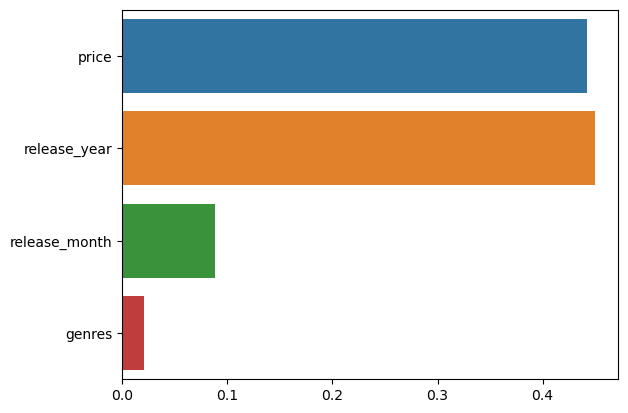

In [157]:
import seaborn as sns
sns.barplot(x=dt_regressor.feature_importances_, y=X_train.columns)

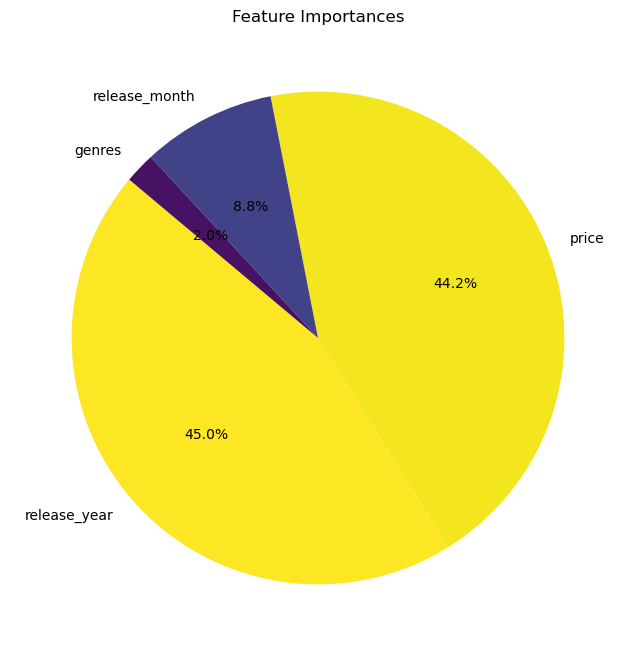

In [164]:
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(importances_df['Importance'], labels=importances_df['Feature'], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(importances_df['Importance'] / importances_df['Importance'].max()))
plt.title('Feature Importances')
plt.show()